In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from functools import reduce
import seaborn as sns
from scipy import stats

In [2]:
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/DAT565/Data/hemnet.csv')

Mounted at /content/drive/


In [3]:
display(df)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


slope: 19370.14
intercept: 2220603.24


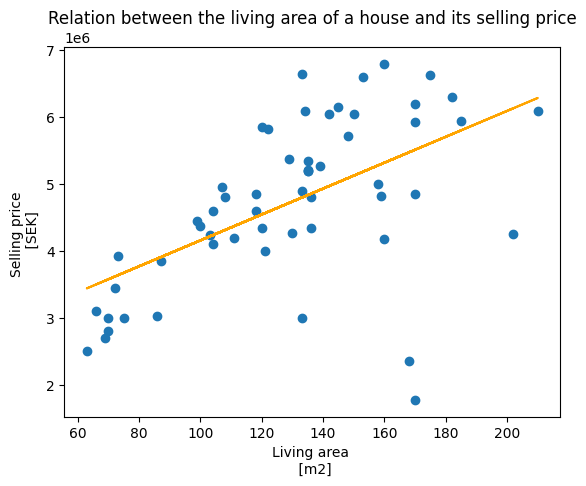

In [4]:
plt.scatter(df['Living_area'], df['Selling_price'])

k, m, _, _, _ = stats.linregress(df.Living_area, df.Selling_price)
print(f"slope: {k:.7}")
print(f"intercept: {m:.9}")

plt.plot(df.Living_area, k*df.Living_area + m, color="orange")
plt.xlabel('Living area \n [m2]')
plt.ylabel('Selling price \n [SEK]')
plt.title('Relation between the living area of a house and its selling price')
plt.show()

In [5]:
#f(x) = k*x+m
price_100 = k*100+m
price_150 = k*150+m
price_200 = k*200+m

print(f"Predicted selling price for a house with living area of: \n 100m^2: {price_100:.8} SEK \n 150m^2: {price_150:.8} SEK \n 200m^2: {price_200:.8} SEK")

Predicted selling price for a house with living area of: 
 100m^2: 4157617.1 SEK 
 150m^2: 5126124.0 SEK 
 200m^2: 6094631.0 SEK


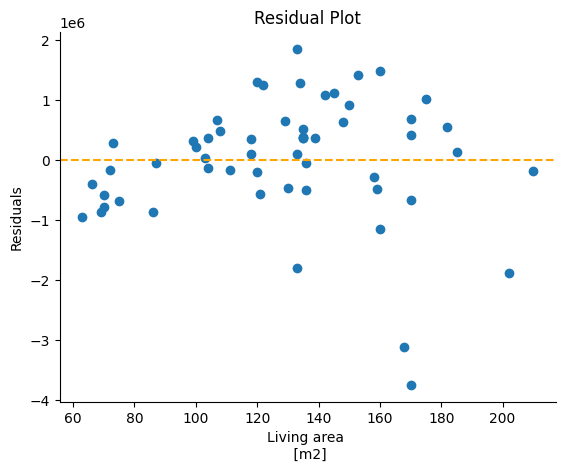

In [6]:
predicted = k * df.Living_area + m

# Compute residuals
residuals = df.Selling_price - predicted

plt.scatter(df['Living_area'], residuals)
plt.axhline(0, color='orange', linestyle='--')
plt.xlabel('Living area \n [m2]')
plt.ylabel('Residuals')
plt.title('Residual Plot')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

We could play around with the order of the regression line

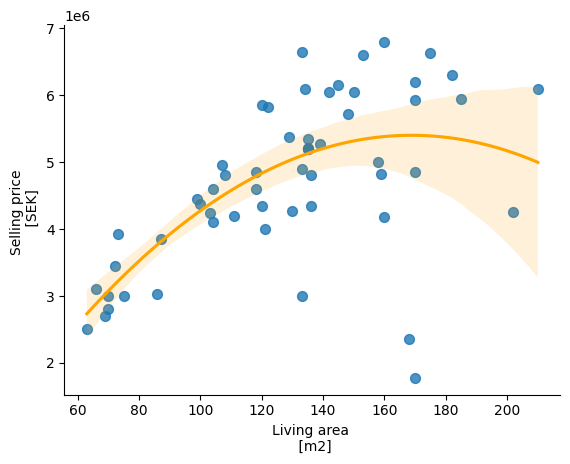

In [7]:
ax = sns.regplot(x=df['Living_area'], y=df['Selling_price'], order=2, line_kws={'color':'orange'}, scatter_kws={'s': 50})
ax.set_xlabel('Living area \n [m2]')
ax.set_ylabel('Selling price \n [SEK]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

#Section 2

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
iris.data[0:1]

array([[5.1, 3.5, 1.4, 0.2]])

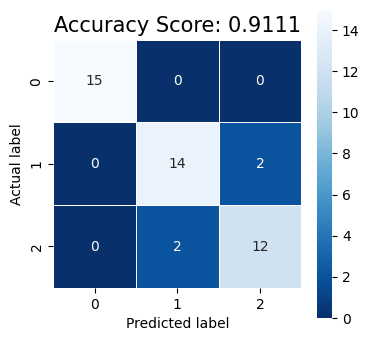

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)
# logisticRegr.predict(x_test[0].reshape(1,-1))
# logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

K-Nearest neighbours: uniform

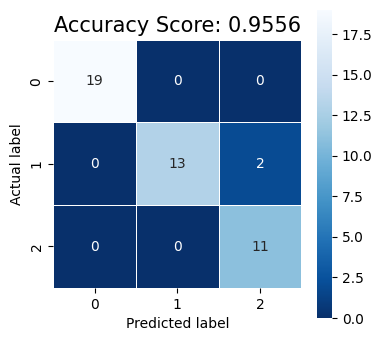

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
# create KNN Classifier
kn1 = KNeighborsClassifier(n_neighbors=1) #k=1,3,21

# train the model using the training sets
kn1.fit(X_train, y_train)
# predict the response for test dataset
y_pred1 = kn1.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
score1 = metrics.accuracy_score(y_test, y_pred1)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score1)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

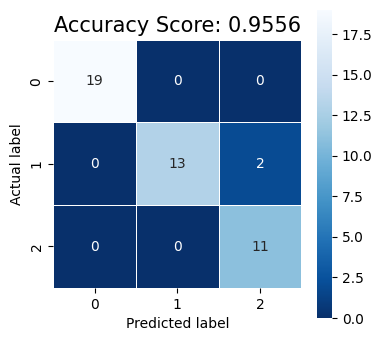

In [11]:
# create KNN Classifier
kn3 = KNeighborsClassifier(n_neighbors=3) #k=1,3,21

# train the model using the training sets
kn3.fit(X_train, y_train)
# predict the response for test dataset
y_pred3 = kn3.predict(X_test)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
score3 = metrics.accuracy_score(y_test, y_pred3)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score3)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

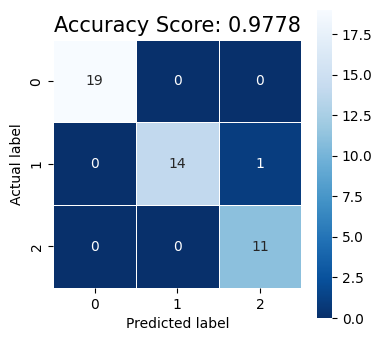

In [12]:
# create KNN Classifier
kn21 = KNeighborsClassifier(n_neighbors=21) #k=1,3,21

# train the model using the training sets
kn21.fit(X_train, y_train)
# predict the response for test dataset
y_pred21 = kn21.predict(X_test)
conf_matrix21 = confusion_matrix(y_test, y_pred21)
score21 = metrics.accuracy_score(y_test, y_pred21)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix21, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score21)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

K-nearest neighbours: distance-based

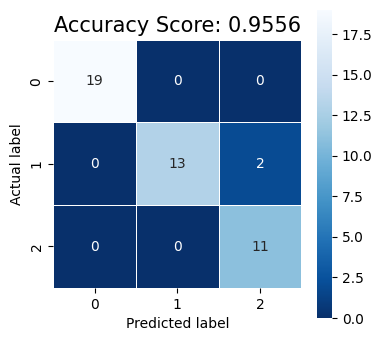

In [13]:
# create KNN Classifier
kn1b = KNeighborsClassifier(n_neighbors=1, weights ='distance') #k=1,3,21

# train the model using the training sets
kn1b.fit(X_train, y_train)
# predict the response for test dataset
y_pred1b = kn1b.predict(X_test)
conf_matrix1b = confusion_matrix(y_test, y_pred1b)
score1b = metrics.accuracy_score(y_test, y_pred1b)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix1b, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score1b)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

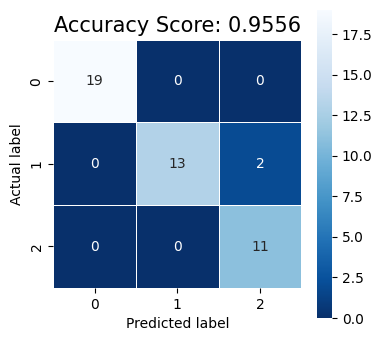

In [14]:
# create KNN Classifier
kn3b = KNeighborsClassifier(n_neighbors=3, weights = 'distance') #k=1,3,21

# train the model using the training sets
kn3b.fit(X_train, y_train)
# predict the response for test dataset
y_pred3b = kn3b.predict(X_test)
conf_matrix3b = confusion_matrix(y_test, y_pred3b)
score3b = metrics.accuracy_score(y_test, y_pred3b)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix3b, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score3b)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

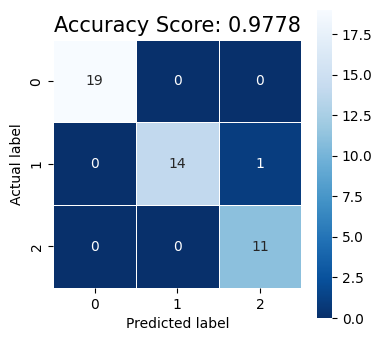

In [15]:
# create KNN Classifier
kn21b = KNeighborsClassifier(n_neighbors=21, weights = 'distance') #k=1,3,21

# train the model using the training sets
kn21b.fit(X_train, y_train)
# predict the response for test dataset
y_pred21b = kn21b.predict(X_test)
conf_matrix21b = confusion_matrix(y_test, y_pred21b)
score21b = metrics.accuracy_score(y_test, y_pred21b)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix21b, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.4f}'.format(score21b)
plt.title(all_sample_title, size = 15)
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Text(158.22222222222223, 0.5, 'K-Nearest neigbours, weighted')

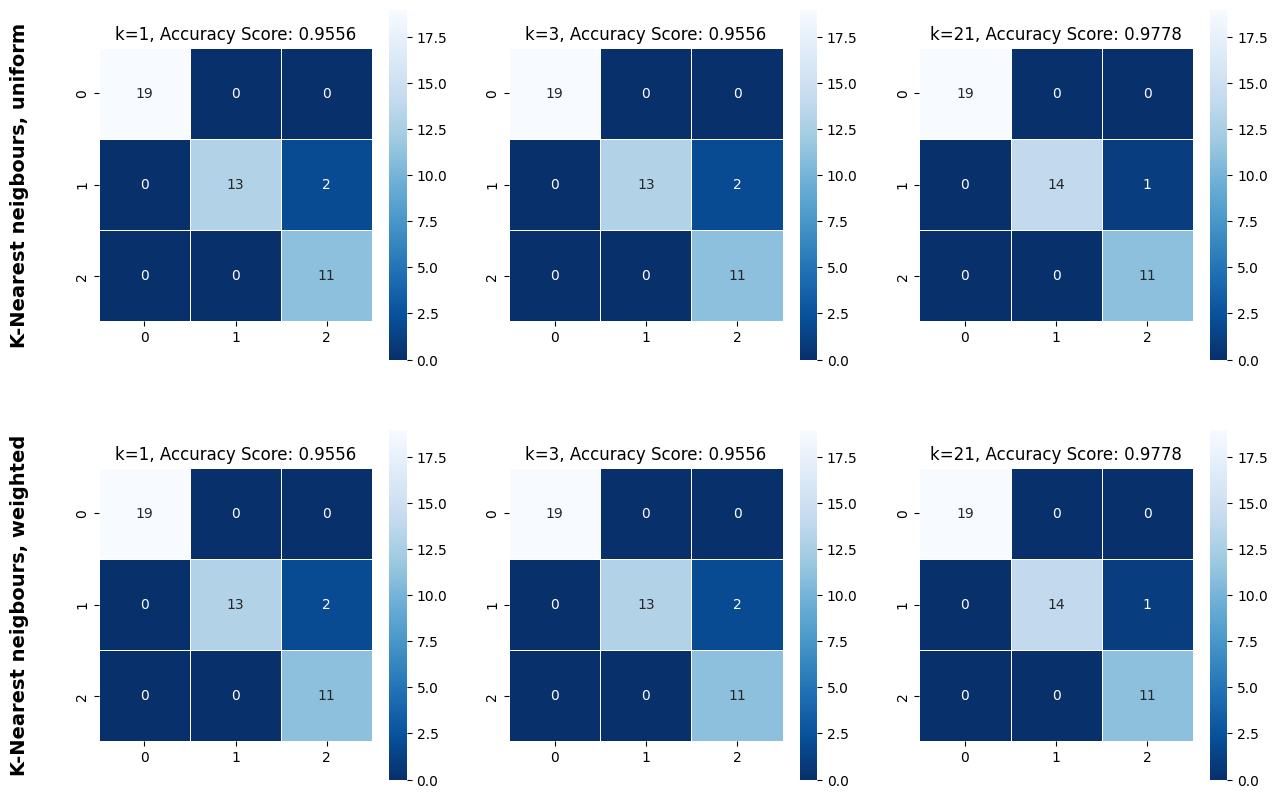

In [16]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

sns.heatmap(conf_matrix1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[0,0])
axs[0, 0].set_title('k=1, Accuracy Score: {:.4f}'.format(score1))

sns.heatmap(conf_matrix3, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[0,1])
axs[0,1].set_title('k=3, Accuracy Score: {:.4f}'.format(score3))

sns.heatmap(conf_matrix21, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[0,2])
axs[0,2].set_title('k=21, Accuracy Score: {:.4f}'.format(score21))

sns.heatmap(conf_matrix1b, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[1,0])
axs[1,0].set_title('k=1, Accuracy Score: {:.4f}'.format(score1b))

sns.heatmap(conf_matrix3b, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[1,1])
axs[1,1].set_title('k=3, Accuracy Score: {:.4f}'.format(score3b))

sns.heatmap(conf_matrix21b, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', ax=axs[1,2])
axs[1,2].set_title('k=21, Accuracy Score: {:.4f}'.format(score21b))

axs[0, 0].set_ylabel('K-Nearest neigbours, uniform', rotation=90, labelpad=40, va='center', fontsize=14, fontweight='bold')
axs[1, 0].set_ylabel('K-Nearest neigbours, weighted', rotation=90, labelpad=40, va='center', fontsize=14, fontweight='bold')


# fig.text(0.28, 0.2, 'K-Nearest neigbours, uniform', ha='center', va='center', fontsize=14, fontweight='bold')
# fig.text(0.7, 0.2, 'K-Nearest neigbours, weighted', ha='center', va='center', fontsize=14, fontweight='bold')
